In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#!pip install folium

In [162]:
#df_21 = pd.read_csv("data/2021.csv", index_col=0, sep=";") # pas la même chose, jsp ce que c
df_lieux_21 = pd.read_csv("data/lieux-2021.csv", index_col=0, sep=";")
df_usagers_21 = pdz.read_csv("data/usagers-2021.csv", index_col=0, sep=";")
df_vehicules_21 = pd.read_csv("data/vehicules-2021.csv", index_col=0, sep=";")
df_carac_21 = pd.read_csv("data/carcteristiques-2021.csv", index_col=0, sep=";")
df_velos = pd.read_csv("data/accidents-velos.csv", index_col=0)
df_pistes = pd.read_csv("data/Amenagement_Cyclistes_Petite_Couronne_Paris.csv", sep=";")

df_velos.date = pd.to_datetime(df_velos.date)

/var/folders/19/pckvwjyn0r7630jpjn3lh1800000gn/T/ipykernel_1872/1979600351.py:6: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_velos = pd.read_csv("data/accidents-velos.csv", index_col=0)


#### Check_dataframes

In [43]:
df_usagers_21

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
Num_Acc,,,,,,,,,,,,,,
202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202100056516,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1
202100056516,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1
202100056517,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1


In [44]:
df_lieux_21

,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
Num_Acc,,,,,,,,,,,,,,,,,
202100000001,3,981,-1,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,80
202100000002,3,20,0,E,2,2,0,1,0,10,1,NaN,-1,1,0,1,80
202100000003,4,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
202100000004,3,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,4,0,1,0,1,1,NaN,-1,1,0,1,50
202100000005,7,PARIS. ROUTE DE,-1,NaN,2,2,-1,1,11,150,1,NaN,-1,1,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202100056514,1,65,-1,NaN,3,4,0,2,0,454,3,NaN,-1,2,9,2,130
202100056515,3,520,0,D,2,2,0,1,46,2,1,NaN,-1,5,0,3,80
202100056516,3,538,-1,NaN,2,2,0,2,49,24,2,NaN,-1,2,0,1,80


In [45]:
df_vehicules_21[df_vehicules_21.catv == 1] # cat vehicules 1 : vélos

,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
Num_Acc,,,,,,,,,,
202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
202100000006,201 752,B01,2,1,0,0,5,1,5,NaN
202100000038,201 693,B01,1,1,0,2,1,1,5,NaN
202100000051,201 658,A01,3,1,0,2,8,1,5,NaN
202100000070,201 625,B01,0,1,0,2,0,0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...
202100056346,101 181,A01,1,1,0,1,1,13,0,NaN
202100056362,101 157,B01,2,1,0,2,0,1,5,NaN
202100056404,101 079,A01,1,1,0,2,1,25,5,NaN


#### Database velos preprocessed

<AxesSubplot: >

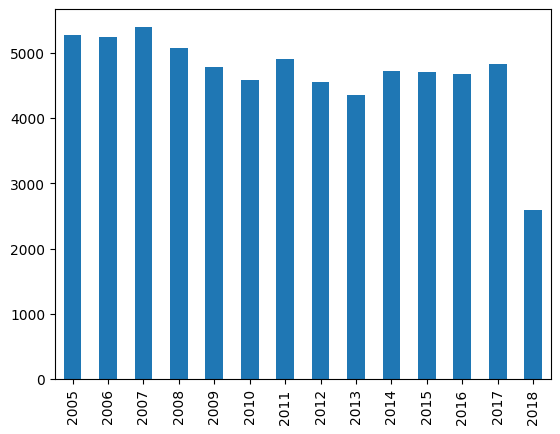

In [8]:
accidents_per_year = df_velos.date.dt.year.value_counts()
accidents_per_year.sort_index().plot.bar()

In [ ]:
df_velos[df_velos.date.dt.year == 2018].groupby(["date"]).agg({"departement": "count"}).sort_index().plot.line()

#### Display map

In [135]:
import folium

In [13]:
PARIS_LAT_LONG = [48.864716, 2.349014]
ZOOM_START = 10

df_velos = df_velos[df_velos.lat.notna()]
df_velos = df_velos[df_velos.lon.notna()]

# Display map
map_france = folium.Map(location=PARIS_LAT_LONG, zoom_start=ZOOM_START)

for index, accident in df_velos[df_velos.date.dt.year == 2018].sample(100).iterrows():
    location = [accident.lat, accident.lon]
    folium.Marker(location, popup = f'lat:{accident.lat} \n lon:{accident.lon}').add_to(map_france)

In [15]:
piste = [[2.3695431, 48.8596219], [2.3698638, 48.8597083], [2.3708222, 48.8599603], [2.3708904, 48.8599782], [2.3709677, 48.85999849999999], [2.371884499999988, 48.8602342], [2.372037, 48.8602752]]
piste = [[b, a] for a, b in piste]

In [ ]:
folium.PolyLine(piste, color="red", weight=2.5, opacity=1).add_to(map_france)

### calculate distance

#### funcdef

In [170]:
import math

def dot(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)

def pnt2line(pnt, start, end):
    """
    Calcule la distance entre un points et un segment
    -> renvoie la distance min et le point le plus proche du segment
    """
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return (dist, nearest)

#### Calc distance

In [166]:
piste = [[2.3695431, 48.8596219], [2.3698638, 48.8597083], [2.3708222, 48.8599603], [2.3708904, 48.8599782], [2.3709677, 48.85999849999999], [2.371884499999988, 48.8602342], [2.372037, 48.8602752]]
piste = [[b, a] for a, b in piste]

In [34]:

accident = df_velos.sample(1).iloc[0]
accident_loc = accident.lat, accident.lon

segments = [(piste[i-1], piste[i]) for i in range(len(piste))]

pnt2line(accident_loc, segments[0][0], segments[0][1]) # returns (distance, (coords projected point))

(3.972006970216444, (48.8602752, 2.372037))

In [167]:
import json
import numpy as np

pistes = {
    idx: [[b, a] for [a, b] in json.loads(row["Geo Shape"])["coordinates"]]
    for idx, row in df_pistes.iterrows() 
    if len(str(row["Geo Shape"])) > 3
}
segments = {
    idx : [(piste[i-1], piste[i]) for i in range(len(piste))]
    for idx, piste in pistes.items()
}

In [ ]:
import random

# Display pistes
map_france = folium.Map(location=PARIS_LAT_LONG, zoom_start=ZOOM_START)

for idx, line in pistes.items():
    folium.PolyLine(line, color="red", weight=2.5, opacity=1).add_to(map_france)

In [171]:
distances = {
    idx: min(pnt2line(accident_loc, seg[0], seg[1])[0] for seg in segment if seg[0] != seg[1])
    for idx, segment in segments.items()
}

In [ ]:
min(distances, key=lambda x: distances[x])

15882

In [60]:
df_pistes["longueur"]

0         37
1        325
2        197
3        361
4         68
        ... 
50089     70
50090    159
50091     88
50092      9
50093     21
Name: longueur, Length: 50094, dtype: int64

### Check df velos columns

In [ ]:
df_velos.columns.tolist()

['date',
 'mois',
 'jour',
 'heure',
 'departement',
 'commune',
 'lat',
 'lon',
 'en agglomeration',
 'type intersection',
 'type collision',
 'luminosite',
 'conditions atmosperiques',
 'type route',
 'circulation',
 'nb voies',
 'profil long route',
 'trace plan route',
 'largeur TPC',
 'largeur route',
 'etat surface',
 'amenagement',
 'situation',
 'categorie usager',
 'gravite accident',
 'sexe',
 'age',
 'motif deplacement',
 'existence securite',
 'usage securite',
 'obstacle fixe heurte',
 'obstacle mobile heurte',
 'localisation choc',
 'manoeuvre avant accident',
 'identifiant vehicule',
 'type autres vehicules',
 'manoeuvre autres vehicules',
 'nombre autres vehicules']

In [ ]:
df_velos["amenagement"].value_counts()

Carrefour aménagé                          4959
Pont - autopont                             775
Zone piétonne                               665
Voie ferrée                                 362
Bretelle d’échangeur ou de raccordement     272
Souterrain - tunnel                         198
Zone de péage                                 6
Name: amenagement, dtype: int64

In [ ]:
df_velos['usage securite'].value_counts()

Non déterminable    26426
Oui                 17964
Non                 14131
Name: usage securite, dtype: int64

In [74]:
df_velos["type route"].value_counts()

Voie Communale                                            43349
Route Départementale                                      17813
Route Nationale                                            2168
Autre                                                      1847
Parc de stationnement ouvert à la circulation publique      297
Hors réseau public                                          162
Autoroute                                                    66
Name: type route, dtype: int64

In [75]:
df_velos["etat surface"].value_counts()

normale               55960
mouillée               6624
autre                   310
verglacée               102
enneigée                 74
corps gras - huile       53
flaques                  41
boue                     12
inondée                   8
Name: etat surface, dtype: int64

In [78]:
df_velos['situation'].value_counts()

Sur chaussée                   55100
Sur piste cyclable              4141
Sur trottoir                    1452
Sur accotement                   781
Sur bande d’arrêt d’urgence       83
Name: situation, dtype: int64

In [79]:
df_velos.shape

(65713, 38)

### Filter data from paris

In [143]:
PARIS_LAT_LONG = [48.864716, 2.349014]
ZOOM_START = 10
map_paris = folium.Map(location=PARIS_LAT_LONG, zoom_start=ZOOM_START)

df_paris = df_velos[(df_velos.lon > 2.201843 ) & ( df_velos.lon < 2.474864)]
df_paris = df_paris[(df_paris.lat < 48.927875 ) & ( df_paris.lat > 48.779379)]

locations = [(row.lat, row.lon) for _, row in df_paris.iterrows()]
weights = df_paris["gravite accident"].str[0].astype(int)

folium.plugins.HeatMap(locations, weights).add_to(map_paris)

In [144]:
map_paris

In [125]:
df_paris["gravite"] = df_paris["gravite accident"].str[0].astype(int)

In [147]:
df_paris["situation"].value_counts()

Sur chaussée          1960
Sur piste cyclable     340
Sur trottoir            56
Sur accotement           8
Name: situation, dtype: int64

In [159]:
df_velos[df_velos["commune"].str[:2] == "75"]

,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,type intersection,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
identifiant accident,,,,,,,,,,,,,,,,,,,,,
200500004591,2005-01-04,01 - janvier,1 - mardi,17.0,75,75001,0.00000,0.00000,oui,Hors intersection,...,Casque,Oui,NaN,Véhicule,Avant,Sans changement de direction,200500004591B01,VL seul,Ouverture de porte,1.0
200500004597,2005-01-03,01 - janvier,0 - lundi,9.0,75,75005,0.00000,0.00000,oui,Intersection en X,...,NaN,NaN,NaN,Véhicule,Arrière,Tournant à gauche,200500004597A01,Motocyclette,Sans changement de direction,1.0
200500004600,2005-01-03,01 - janvier,0 - lundi,17.0,75,75019,0.00000,0.00000,oui,Intersection en T,...,NaN,NaN,NaN,Piéton,Avant,Sans changement de direction,200500004600A01,NaN,NaN,NaN
200500004627,2005-01-05,01 - janvier,2 - mercredi,18.0,75,75007,0.00000,0.00000,oui,Intersection en T,...,NaN,NaN,NaN,Véhicule,Avant droit,Tournant à gauche,200500004627A01,VL seul,Sans changement de direction,1.0
200500004630,2005-01-05,01 - janvier,2 - mercredi,8.0,75,75013,0.00000,0.00000,oui,Intersection en T,...,Casque,Oui,NaN,Véhicule,Avant,Sans changement de direction,200500004630B01,VL seul,Tournant à gauche,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201800050291,2018-07-10,07 - juillet,1 - mardi,9.0,75,75101,48.86400,2.33134,oui,Intersection en T,...,Casque,Non,Autre obstacle fixe sur chaussée,Véhicule,Avant droit,Sans changement de direction,201800050291B01,VL seul,Ouverture de porte,1.0
201800050337,2018-11-17,11 - novembre,5 - samedi,12.0,75,75101,48.85854,2.34825,oui,Intersection en X,...,Casque,Non déterminable,NaN,Véhicule,Côté gauche,Sans changement de direction,201800050337A01,Motocyclette > 125 cm3,Sans changement de direction,1.0
201800050355,2018-02-01,02 - février,3 - jeudi,15.0,75,75102,48.86870,2.34133,oui,Place,...,Casque,Oui,NaN,Véhicule,Avant,"Dans le couloir bus, dans le même sens",201800050355B01,VL seul,Tournant a droite,1.0
